In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing Libraries

In [2]:
# Making necessary imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.preprocessing import StandardScaler

# Reading and Describing Data

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CodSoft Internship/customer-churn-prediction/dataset/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# Data Cleaning

In [6]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

No null value in the dataset

In [7]:
df.duplicated().sum()

0

No duplicate values

In [8]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [9]:
# dropping unnecessary columns
drop_cols = ['CustomerId','Surname','RowNumber']
df.drop(drop_cols, axis=1, inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
print(df['Geography'].unique())
df['Geography'].value_counts()

['France' 'Spain' 'Germany']


France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

# Exploratory Data Analysis (EDA)

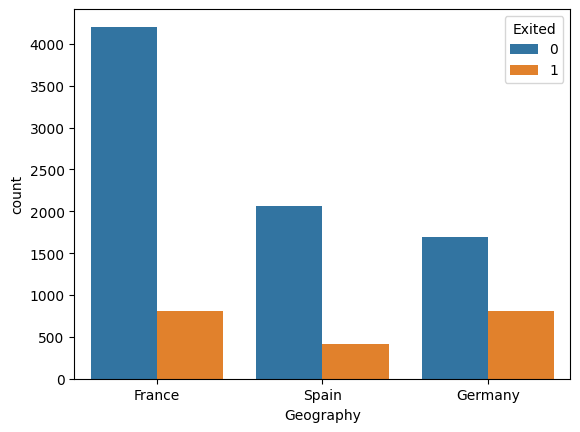

In [11]:
sns.countplot(x='Geography',hue='Exited',data=df)
plt.show()

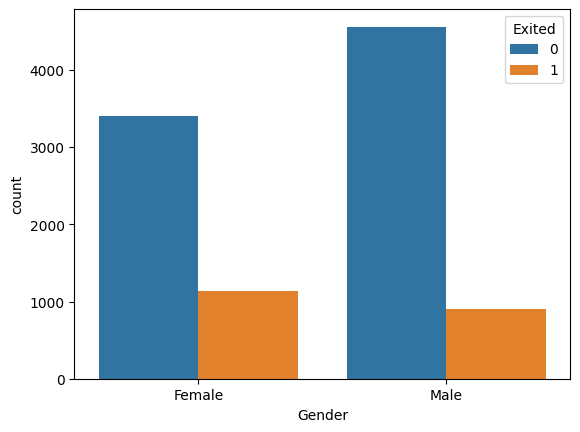

In [12]:
sns.countplot(x='Gender',hue='Exited',data=df)
plt.show()

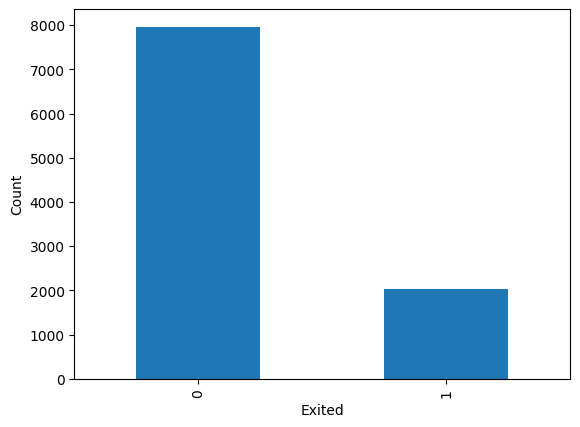

In [13]:
df['Exited'].value_counts().plot(kind='bar')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.show()

# Encoding Categorical Features

In [14]:
df = pd.get_dummies(df, columns=['Gender','Geography'])
order = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Gender_Female',
       'Gender_Male', 'Geography_France', 'Geography_Germany', 'Geography_Spain', 'Exited']
df = df[order]
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain,Exited
0,619,42,2,0.00,1,1,1,101348.88,1,0,1,0,0,1
1,608,41,1,83807.86,1,0,1,112542.58,1,0,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,1,0,0,1
3,699,39,1,0.00,2,0,0,93826.63,1,0,1,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,1,0,0,0,1,0


In [15]:
X = df.drop(columns=['Exited'])
y = df['Exited']

In [16]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [17]:
print(X.shape)
y.shape

(10000, 13)


(10000,)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [19]:
lg = LogisticRegression()
rf = RandomForestClassifier(n_estimators=50, random_state=2)
gb = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [20]:
clfs = {
    'lg':lg,
    'rf':rf,
    'gb':gb
}

In [21]:
def train_clfs_and_predict(clfs,X_train,X_test,y_train,y_test):
    acc = []
    prec = []
    conf_mat = []

    for clf in clfs:
        model = clfs[clf]
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        acc.append(accuracy_score(y_test,y_pred))
        prec.append(precision_score(y_test,y_pred))
        conf_mat.append(confusion_matrix(y_test,y_pred))

    return acc, prec, conf_mat

In [22]:
accuracy, precision, conf_mat = train_clfs_and_predict(clfs,X_train,X_test,y_train,y_test)

In [23]:
performance = {
    'classifiers':list(clfs.keys()),
    'accuracy':accuracy,
    'precision':precision,
    'confusion_matrix':conf_mat,
}

In [24]:
perf_df = pd.DataFrame(performance).sort_values(by='accuracy',ascending=False)
perf_df.head()

,classifiers,accuracy,precision,confusion_matrix
2,gb,0.8650,0.786802,"[[1575, 42], [228, 155]]"
1,rf,0.8550,0.714286,"[[1555, 62], [228, 155]]"
0,lg,0.8155,0.555556,"[[1561, 56], [313, 70]]"


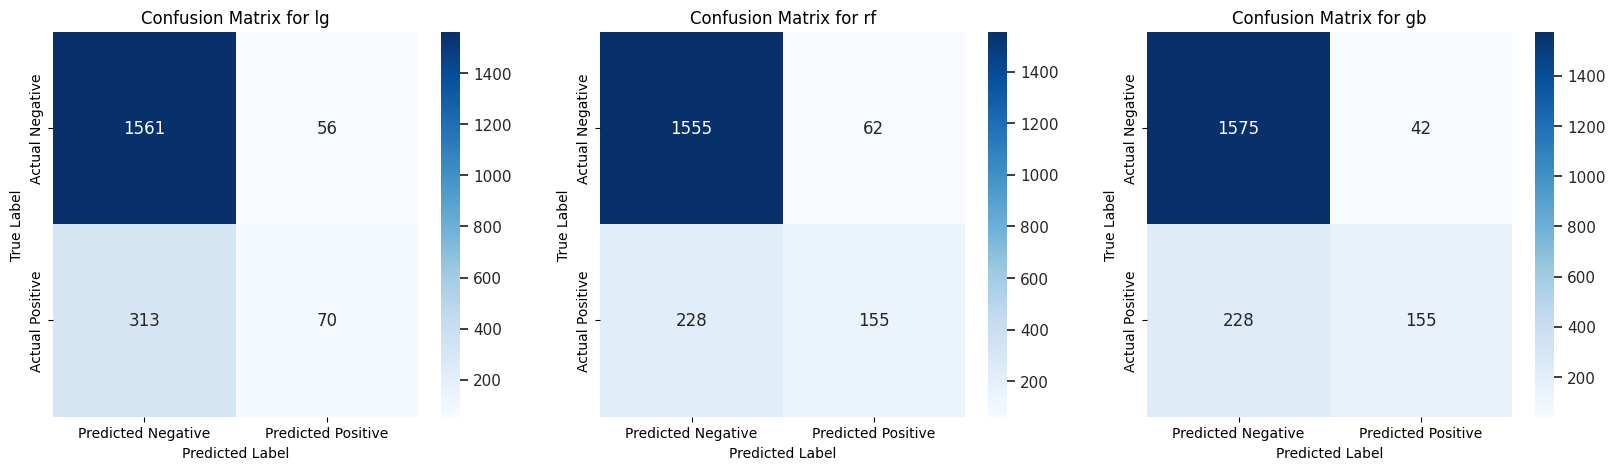

In [25]:
# Plotting confusion matrices of classifiers
num_classifiers = len(conf_mat)

fig, axes = plt.subplots(1, num_classifiers, figsize=(20, 5))  # Adjust figsize as needed

for i, (matrix, classifier) in enumerate(zip(conf_mat, list(clfs.keys()))):
    sns.set(font_scale=1)  # Adjust the font size as needed
    sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Predicted Negative", "Predicted Positive"],
                yticklabels=["Actual Negative", "Actual Positive"],
                ax=axes[i])
    axes[i].set_title(f"Confusion Matrix for {classifier}")
    axes[i].set_xlabel("Predicted Label")
    axes[i].set_ylabel("True Label")

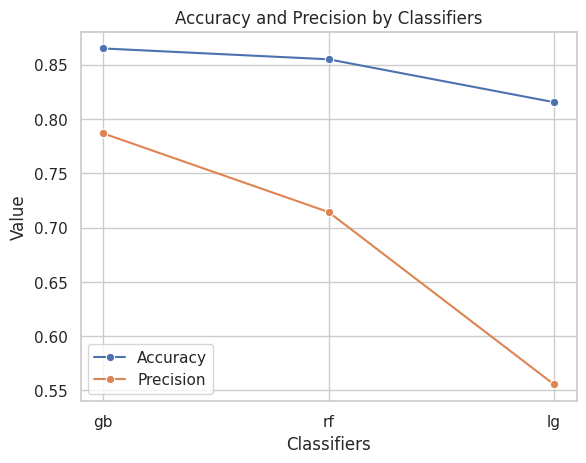

In [26]:
sns.set(style="whitegrid")
sns.lineplot(x=perf_df.classifiers, y=perf_df.accuracy, marker='o', label='Accuracy', data=perf_df)
sns.lineplot(x=perf_df.classifiers, y=perf_df.precision, marker='o', label='Precision', data=perf_df)

plt.title("Accuracy and Precision by Classifiers")
plt.xlabel("Classifiers")
plt.ylabel("Value")
plt.legend()
plt.show()

**RESULT**

The above plot shows that svc has the best performance with ```accuracy = 86.5%``` and ```precision = 78.68%```

---

